In [1]:
import pandas as pd
import altair as alt
from vega_datasets import data

In [2]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
CSS = """#notebook div.output_subarea {max-width:100%;}""" #changes output_subarea width to 100% (from 100% - 14ex)
HTML('<style>{}</style>'.format(CSS))

In [3]:
from IPython.display import display, HTML

CSS = """
.output {
    align-items: center;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [4]:
### because the country name of some indices are incorrecct. They show the stock exchange name. So we modified it manually.

world_index_hist = pd.read_csv('World Index History.csv')
world_index_info = pd.read_csv('World Index Info.csv')
world_index_hist_vertical = pd.read_csv('World Index History Vertical with change rate.csv')
manual_index_hist_vertical = pd.read_csv('Manual World Index History Vertical with change rate.csv')
world_index_hist_vertical = pd.concat([world_index_hist_vertical, manual_index_hist_vertical]).reset_index()

####################### 横向

# 具体处理过程见 Data Manual

manual_index_hist = pd.read_csv('Manual World Index History.csv')
manual_index_hist['WICAN.FGI'] = manual_index_hist['WICAN.FGI'].apply(
    lambda x: float(x.split()[0].replace(',', ''))
    if(',' in str(x)) else float(x))
manual_index_hist['WIIDN.FGI'] = manual_index_hist['WIIDN.FGI'].apply(
    lambda x: float(x.split()[0].replace(',', ''))
    if(',' in str(x)) else float(x))
manual_index_hist['WIBRA.FGI'] = manual_index_hist['WIBRA.FGI'].apply(
    lambda x: float(x.split()[0].replace(',', ''))
    if(',' in str(x)) else float(x))
manual_index_hist['^DJEG20E '] = manual_index_hist['^DJEG20E '].apply(
    lambda x: float(x.split()[0].replace(',', ''))
    if(',' in str(x)) else float(x))
manual_index_hist['^OMXI10'] = manual_index_hist['^OMXI10'].apply(
    lambda x: float(x.split()[0].replace(',', ''))
    if(',' in str(x)) else float(x))
manual_index_hist['CRE.VI'] = manual_index_hist['CRE.VI'].apply(
    lambda x: float(x.split()[0].replace(',', ''))
    if(',' in str(x)) else float(x))
manual_index_hist['XU100.IS'] = manual_index_hist['XU100.IS'].apply(
    lambda x: float(x.split()[0].replace(',', ''))
    if(',' in str(x)) else float(x))
manual_index_hist['^OMXC25 '] = manual_index_hist['^OMXC25 '].apply(
    lambda x: float(x.split()[0].replace(',', ''))
    if(',' in str(x)) else float(x))
manual_index_hist['PSI20.LS'] = manual_index_hist['PSI20.LS'].apply(
    lambda x: float(x.split()[0].replace(',', ''))
    if(',' in str(x)) else float(x))
manual_index_hist['FVTT.FGI'] = manual_index_hist['FVTT.FGI'].apply(
    lambda x: float(x.split()[0].replace(',', ''))
    if(',' in str(x)) else float(x))
manual_index_hist['WIPER.FGI'] = manual_index_hist['WIPER.FGI'].apply(
    lambda x: float(x.split()[0].replace(',', ''))
    if(',' in str(x)) else float(x))
manual_index_hist['WIPHL.FGI'] = manual_index_hist['WIPHL.FGI'].apply(
    lambda x: float(x.split()[0].replace(',', ''))
    if(',' in str(x)) else float(x))
manual_index_hist['WICHL.FGI'] = manual_index_hist['WICHL.FGI'].apply(
    lambda x: float(x.split()[0].replace(',', ''))
    if(',' in str(x)) else float(x))

world_index_hist = world_index_hist.merge(manual_index_hist, how='left', on='Date')

price_index_1902 = world_index_hist[35:36]     # price on 19 Feb. 
price_index_1410 = world_index_hist[205:206]    # price on 12 Oct. 

price_index = pd.concat([price_index_1902, price_index_1410]).dropna(axis = 1)
price_index = price_index.drop('Date', axis=1)
price_index.reset_index(drop=True, inplace=True)

change_rate_indices = price_index.astype(float).pct_change()
change_rate_indices = change_rate_indices.loc[1].to_frame().reset_index().rename(columns = {'index': 'Name', 1 : 'change_rate'})
indices_df = change_rate_indices.merge(world_index_info, on='Name')
indices_df['change_rate_percentage'] =indices_df['change_rate'].apply(lambda x: format(x, '.2%'))
indices_df['Country'] = indices_df['Country'].str.upper()
indices_df = indices_df.drop('Unnamed: 0', axis=1)
# indices_df

code_lookup = pd.read_csv("country_lookup.csv")
indices_df = indices_df.merge(code_lookup, left_on='Country', right_on='Alpha-2 code')
indices_df = indices_df.rename(columns = {'Country_y': 'location', 'Numeric code': 'id'}).drop('Country_x', axis=1)
# indices_df

covid_data = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
case_data = covid_data.loc[:, ['location', 'total_cases_per_million', 'continent']]
case_data = case_data.groupby('location').last().reset_index()
indices_df = indices_df.merge(case_data, on='location', how='left')
# indices_df

### group by country

change_rate_indices_by_country = indices_df.groupby('location').first().reset_index()
change_rate_indices_by_country['location'] = change_rate_indices_by_country['location']
change_rate_indices_by_country['change_rate_nom'] =change_rate_indices_by_country['change_rate'].apply(lambda x: abs(x))
# change_rate_indices_by_country

### Hong Kong is a part of China, so the COVID-19 data considered these two as an ensemble. Hong Kong will take the data of China

change_rate_indices_by_country.loc[13, 'total_cases_per_million'] = change_rate_indices_by_country.loc[6, 'total_cases_per_million']
change_rate_indices_by_country = change_rate_indices_by_country.dropna(subset = ['total_cases_per_million'])
### group by continent

change_rate_indices_by_continent = indices_df.groupby('continent').mean().reset_index()
change_rate_indices_by_continent['change_rate_percentage'] =change_rate_indices_by_continent['change_rate'].apply(lambda x: format(x, '.2%'))
# change_rate_indices_by_continent

In [5]:
### because the country name of some indices are incorrecct. They show the stock exchange name. So we modified it manually.

world_index_hist3 = pd.read_csv('World Index History.csv')
world_index_info3 = pd.read_csv('World Index Info.csv')
world_index_hist_vertical3 = pd.read_csv('World Index History Vertical with change rate.csv')
manual_index_hist_vertical3 = pd.read_csv('Manual World Index History Vertical with change rate.csv')
world_index_hist_vertical3 = pd.concat([world_index_hist_vertical3, manual_index_hist_vertical3]).reset_index()

####################### 横向

# 具体处理过程见 Data Manual

manual_index_hist3 = pd.read_csv('Manual World Index History.csv')
manual_index_hist3['WICAN.FGI'] = manual_index_hist3['WICAN.FGI'].apply(
    lambda x: float(x.split()[0].replace(',', ''))
    if(',' in str(x)) else float(x))
manual_index_hist3['WIIDN.FGI'] = manual_index_hist3['WIIDN.FGI'].apply(
    lambda x: float(x.split()[0].replace(',', ''))
    if(',' in str(x)) else float(x))
manual_index_hist3['WIBRA.FGI'] = manual_index_hist3['WIBRA.FGI'].apply(
    lambda x: float(x.split()[0].replace(',', ''))
    if(',' in str(x)) else float(x))
manual_index_hist3['^DJEG20E '] = manual_index_hist3['^DJEG20E '].apply(
    lambda x: float(x.split()[0].replace(',', ''))
    if(',' in str(x)) else float(x))
manual_index_hist3['^OMXI10'] = manual_index_hist3['^OMXI10'].apply(
    lambda x: float(x.split()[0].replace(',', ''))
    if(',' in str(x)) else float(x))
manual_index_hist3['CRE.VI'] = manual_index_hist3['CRE.VI'].apply(
    lambda x: float(x.split()[0].replace(',', ''))
    if(',' in str(x)) else float(x))
manual_index_hist3['XU100.IS'] = manual_index_hist3['XU100.IS'].apply(
    lambda x: float(x.split()[0].replace(',', ''))
    if(',' in str(x)) else float(x))
manual_index_hist3['^OMXC25 '] = manual_index_hist3['^OMXC25 '].apply(
    lambda x: float(x.split()[0].replace(',', ''))
    if(',' in str(x)) else float(x))
manual_index_hist3['PSI20.LS'] = manual_index_hist3['PSI20.LS'].apply(
    lambda x: float(x.split()[0].replace(',', ''))
    if(',' in str(x)) else float(x))
manual_index_hist3['FVTT.FGI'] = manual_index_hist3['FVTT.FGI'].apply(
    lambda x: float(x.split()[0].replace(',', ''))
    if(',' in str(x)) else float(x))
manual_index_hist3['WIPER.FGI'] = manual_index_hist3['WIPER.FGI'].apply(
    lambda x: float(x.split()[0].replace(',', ''))
    if(',' in str(x)) else float(x))
manual_index_hist3['WIPHL.FGI'] = manual_index_hist3['WIPHL.FGI'].apply(
    lambda x: float(x.split()[0].replace(',', ''))
    if(',' in str(x)) else float(x))
manual_index_hist3['WICHL.FGI'] = manual_index_hist3['WICHL.FGI'].apply(
    lambda x: float(x.split()[0].replace(',', ''))
    if(',' in str(x)) else float(x))

world_index_hist3 = world_index_hist3.merge(manual_index_hist3, how='left', on='Date')


price_index_1902 = world_index_hist3[35:36]     # price on 19 Feb. 
price_index_1903 = world_index_hist3[56:57]    # price on 19 Mar.

price_index3 = pd.concat([price_index_1902, price_index_1903]).dropna(axis = 1)
price_index3 = price_index3.drop('Date', axis=1)
price_index3.reset_index(drop=True, inplace=True)

change_rate_indices3 = price_index3.astype(float).pct_change()
change_rate_indices3 = change_rate_indices3.loc[1].to_frame().reset_index().rename(columns = {'index': 'Name', 1 : 'drop_rate'})
indices_df3 = change_rate_indices3.merge(world_index_info3, on='Name')
indices_df3 = indices_df3.merge(change_rate_indices, on='Name')

indices_df3['drop_rate_percentage'] =indices_df3['drop_rate'].apply(lambda x: format(x, '.2%'))
indices_df3['change_rate_percentage'] =indices_df3['change_rate'].apply(lambda x: format(x, '.2%'))
indices_df3['Country'] = indices_df3['Country'].str.upper()
indices_df3 = indices_df3.drop('Unnamed: 0', axis=1)
# indices_df

code_lookup = pd.read_csv("country_lookup.csv")
indices_df3 = indices_df3.merge(code_lookup, left_on='Country', right_on='Alpha-2 code')
indices_df3 = indices_df3.rename(columns = {'Country_y': 'location', 'Numeric code': 'id'}).drop('Country_x', axis=1)
# indices_df

covid_data = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
case_data = covid_data.loc[:, ['location', 'total_cases_per_million', 'continent']]
case_data3 = case_data.groupby('location').last().reset_index()
indices_df3 = indices_df3.merge(case_data, on='location', how='left')
# indices_df

### group by country

change_rate_indices_by_country3 = indices_df3.groupby('location').first().reset_index()
change_rate_indices_by_country3['location'] = change_rate_indices_by_country3['location']
# change_rate_indices_by_country

### Hong Kong is a part of China, so the COVID-19 data considered these two as an ensemble. Hong Kong will take the data of China

change_rate_indices_by_country3.loc[13, 'total_cases_per_million'] = change_rate_indices_by_country3.loc[6, 'total_cases_per_million']
change_rate_indices_by_country3 = change_rate_indices_by_country3.dropna(subset = ['total_cases_per_million'])
change_rate_indices_by_country3['drop_rate_nom'] =change_rate_indices_by_country3['drop_rate'].apply(lambda x: abs(x))
change_rate_indices_by_country3['change_rate_nom'] =change_rate_indices_by_country3['change_rate'].apply(lambda x: abs(x))
### group by continent

# change_rate_indices_by_continent2 = indices_df2.groupby('continent').mean().reset_index()
# change_rate_indices_by_continent2['change_rate_percentage'] =change_rate_indices_by_continent2['change_rate'].apply(lambda x: format(x, '.2%'))

# change_rate_indices_by_continent

change_rate_indices_by_country3.to_csv('change_rate_indices_by_country3.csv')

In [6]:
change_rate_indices_by_country4=pd.read_csv('change_rate_indices_by_country3_vertical.csv')

# <center>The Impact of COVID-19 on Stock Market<center>

<center>Zheng Yao, Yuxin Liu, Jaleed Aslam, Jiale Cheng

2020 continues to surprise. A pandemic, the shutdown of the global economy, the deepest recession since the 1930s, a global equity market collapse and now, record highs for the U.S. equity market. We’re still in the early recovery phase of the cycle following the COVID-19 recession. This implies an extended period of low-inflation, low-interest-rate growth—an environment that usually favors equities over bonds. In this project, we will answer the following questions

- **What does global stock market really look like?**

- **Why are there significant differences of stock development among countries and companies in COVID-19?**

- **How to make investment during corona?**

If you are motivated to invest in the stock market but don't know the direction, or you are just curious about the recent stock market situation. Here is the right place for you. Come on! Let's play around and figure it out together! _*The tip for interactive part are italic.*_ Don't miss the chance!

## <center>Global Level: Among continents, among countries<center>

For an overview worldwide, we gathered the price history of 62 general equity market indices from 43 countries. The chosen indices are recognized as an efficient measurement of the real equity market and be able to help investors establish an overview of national market performance. You may find the price change rate of the national stock index in the map below. 

*_Don't forget to move your mouse over the map to explore more!_*

**<font color = orange>Orange = EARNING</font>** 

**<font color = grey>Grey = LOSING</font>** 

**SIZE = Change rate to the price on 19 Feb., when COVID-19 was announced as a global pandemic and led to the equity market collapse.** We calculated it with this fomular:

<font size=4><center> $ \frac{Price(14. Oct.) - Price(19. Feb.)}{Price(19. Feb.)} $ <center><font size=4>

In [7]:
countries = alt.topo_feature(data.world_110m.url, 'countries')

map1 = alt.Chart(countries).mark_geoshape(
    stroke='white',
    fill='#e5e4db'
)

symbols = alt.Chart(change_rate_indices_by_country).mark_circle().encode(
    longitude='Longitude (average)',
    latitude='Latitude (average)',
    size=alt.Size('change_rate_nom:Q'),
    tooltip=['location', 'change_rate_percentage'],
    color=alt.condition(
        alt.datum.change_rate > 0,
        alt.value("orange"),  # The positive color
        alt.value("grey")  # The negative color
    )
)

map_world = alt.layer(
    map1, symbols
).project(
    type='mercator',
    scale=145,
    center=[25,15]
).properties(
    title = 'Overview of Stock Markets Development Worldwide',
    width = 830,
    height = 450
)

map_world

alt.LayerChart(...)

From this chart we can see, only a few contries has recovered from the Covid-19 Crash and most of winners come from Asia. But don't be sad! Have you seen the big orange dots in **US**, **Argentina**, **New Zealand** and **Iceland**? Some of them are out of surprise, aren't they? Especially the performance of Argentina has benefited its investors with 23% return rate. What a breaking news!

Besides being shoked by these new discoveries, have you ever raised a question: Why do some countries recover so fast? Maybe they dropped less at the very beginning? The crash map below show the maximal drop rate since 19 Feb. 

_*Don't forget to move your mouse!*_

**Size & <font color = blue>Color</font> = Maximal drop rate (19 Feb.-19 Mar.)** 

In [8]:
countries = alt.topo_feature(data.world_110m.url, 'countries')

map3 = alt.Chart(countries).mark_geoshape(
    stroke='white',
    fill='#e5e4db'
)

symbols3 = alt.Chart(change_rate_indices_by_country3).mark_circle().encode(
    longitude='Longitude (average)',
    latitude='Latitude (average)',
    size=alt.Size('drop_rate_nom:Q',),
    tooltip=['location', 'drop_rate_percentage'],
    color='drop_rate_nom:Q')

map_world3 = alt.layer(map3, symbols3).project(
    type='mercator',
    scale=145,
    center=[25,15]
).properties(
    title = 'Overview of Corona Crash Worldwide',
    width = 830,
    height = 450
)

map_world3

alt.LayerChart(...)

You may have found, that all countries reacted with a great drop to WHO's announcement. Comlombia's equity market value was even cut off by 60%. And China, which was firstly and seriously hurt by Corona only dropped by 10%. What a difference!

### Question 1: Is there correlation between max. drop rate and final change rate?
Try to figure it out by yourself !

In [9]:
####################### 纵向1

world_index_hist_vertical_merged = world_index_hist_vertical.merge(change_rate_indices_by_country, on = 'Name')
world_index_hist_vertical_merged = world_index_hist_vertical_merged.loc[:, 
                                                                    ['Date',
                                                                     'Price',
                                                                     'Name',
                                                                    'continent',
                                                                    'total_cases_per_million',
                                                                    'location',
                                                                    'Daily Change Rate',
                                                                    'change_rate_percentage',
                                                                    'change_rate']]
world_index_hist_vertical_merged['Daily Change Rate_round'] = world_index_hist_vertical_merged['Daily Change Rate'].apply(lambda x: format(x, '.2'))
world_index_hist_vertical_merged['Date'] = pd.to_datetime(world_index_hist_vertical_merged['Date'], format = '%Y-%m-%d')


####################### 纵向2

world_index_hist_vertical_merged3 = world_index_hist_vertical3.merge(change_rate_indices_by_country3, on = 'Name')
world_index_hist_vertical_merged3 = world_index_hist_vertical_merged3.loc[:, 
                                                                    ['Date',
                                                                     'Price',
                                                                     'Name',
                                                                    'continent',
                                                                    'total_cases_per_million',
                                                                    'location',
                                                                    'Daily Change Rate',
                                                                    'change_rate_percentage',
                                                                    'change_rate']]
world_index_hist_vertical_merged3['Daily Change Rate_round'] = world_index_hist_vertical_merged3['Daily Change Rate'].apply(lambda x: format(x, '.2'))
world_index_hist_vertical_merged3['Date'] = pd.to_datetime(world_index_hist_vertical_merged3['Date'], format = '%Y-%m-%d')


double_bar=alt.Chart(change_rate_indices_by_country4).mark_bar(opacity=0.7).encode(
    alt.X('rate_number:Q', title=None),
    y=alt.Y('location', title=None,
            sort = alt.SortField(field = 'drop_rate_nom', order ='ascending')
           ),
    color="rate_art",
    tooltip=['location', 'drop_rate_percentage', 'change_rate_percentage']
).properties(
    title = 'Dropped Deeper, Recovers More Slowly?',
    width = 400,
    height = 600,
)

double_bar

alt.Chart(...)

### Answer: YES! 

This chart is sorted by descending drop rate. For most of countries, dropped more means recovers more slowly. One outlier is Argentina. It sits 5th from the bottom, dropped most also recovered most. Also for many asian countries, e.g. South Korea, Japan..., they recovers fast even though they were more seriously attacked. Here, we created a wonderful interactive panel for you to discovery:

- the difference among continents
- the difference among countries in one continent
- the whole development of the growth line

_*Click the continent bar to see the difference among countries of this continent. You can also switch to One-Country-View by clicking the country name in the lower bar chart. To the right are the stock growth line of the selected stock markets. Don't forget to hover the mouse to see the date.
To clearify the comparison, the price on 19 Feb. was set as benchmark price, and the growth rate of others day was calculated accordingly.*_

In [10]:
alt.data_transformers.disable_max_rows()

selector = alt.selection_single(empty='all', fields=['continent'])
selector2 = alt.selection_single(empty='all', fields=['location'])

bar_country = alt.Chart(change_rate_indices_by_country).mark_bar().encode(
    alt.X('change_rate:Q', 
          title=None),
#           'Change Rate (19 Feb.- 14 Oct.)'),
    alt.Y('location:O',
          sort = alt.SortField(field = 'change_rate', order ='descending'),
          title=None),
    color=alt.Color('total_cases_per_million:Q',scale=alt.Scale(type='sqrt'), legend=None),
    tooltip = ['location', 'change_rate_percentage']
).properties(
    title = 'Change Rate in Countries',
    width = 200,
    height = 200,
).transform_filter(
    selector
).add_selection(
    selector2
)


bar_continent = alt.Chart(change_rate_indices_by_continent).mark_bar().encode(
    alt.X('change_rate:Q', 
          title=None),
    alt.Y('continent:O',
          sort = alt.SortField(field = 'change_rate', order ='descending'),
          title=None),
    color=alt.Color(
        'total_cases_per_million:Q',
        scale=alt.Scale(type='sqrt'),
    legend=None),
    tooltip = ['continent', 'change_rate_percentage']
).properties(
    title = 'Change Rate in Continents',
    width = 200,
    height = 200,
).add_selection(
    selector
)

###########################################

nearest2 = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['Date'], empty='none')

# The basic line
line = alt.Chart(world_index_hist_vertical_merged).mark_line(interpolate='basis').encode(
    alt.X('Date', title=None),
    alt.Y('Daily Change Rate', title='Growth Rate'),
    color=alt.Color('location', legend=alt.Legend(columns=2))
).properties(
    width=450, height=200    
).transform_filter(
    selector
)

line2 = alt.Chart(world_index_hist_vertical_merged).mark_line(interpolate='basis').encode(
    alt.X('Date', title=None),
    alt.Y('Daily Change Rate', title='Growth Rate'),
    color=alt.Color('location', legend=alt.Legend(columns=2)),
    tooltip = 'Date'
).transform_filter(
    selector2
)

selectors2 = alt.Chart(world_index_hist_vertical_merged).mark_point().encode(
    x='Date',
    opacity=alt.value(0),
).add_selection(
    nearest2
)


points2 = line2.mark_point().encode(
    opacity=alt.condition(nearest2, alt.value(1), alt.value(0))
)

text2 = line2.mark_text(align='left', dx=10, dy=-20).encode(
    text=alt.condition(nearest2, 'Date', alt.value(' '))
)

rules2 = alt.Chart(world_index_hist_vertical_merged).mark_rule(color='gray').encode(
    x='Date',
).transform_filter(
    nearest2
)


hist2 = alt.layer(
    line2, selectors2, points2, rules2, text2
).properties(
    width=450, height=200
)


(bar_continent | line)   & (bar_country | hist2)

alt.VConcatChart(...)

After looking at the development of general equity market indices from 43 countries, you may find some lines similar. Some lay on the ground while some have a sharp decline right after a rapid rebound. Economists classify these recessions patterns into 4 types:

- **V-shaped**: a sharp but brief period of decline followed by a strong recovery
- **U-shaped**: a longer, less-clearly defined trough, and slowly return to trend growth
- **W-shaped**: the economy falls into recession, recovers with a short period of growth, then falls back into recession before finally recovering, giving a "down up down up" pattern resembling the letter W
- **L-shaped**: a severe recession and does not return to trend line growth for a long period

#### <center>4 Recession Shapes in Global Stock Market<center>

In [11]:
world_index_hist_de =  world_index_hist_vertical_merged[world_index_hist_vertical_merged['location'].isin(['Germany'])]
world_index_hist_ar =  world_index_hist_vertical_merged[world_index_hist_vertical_merged['location'].isin(['Argentina'])]
world_index_hist_cn =  world_index_hist_vertical_merged[world_index_hist_vertical_merged['location'].isin(['China'])]
world_index_hist_sg =  world_index_hist_vertical_merged[world_index_hist_vertical_merged['location'].isin(['Singapore'])]
world_index_hist_us =  world_index_hist_vertical_merged[world_index_hist_vertical_merged['location'].isin(['United States'])]
world_index_hist_uk =  world_index_hist_vertical_merged[world_index_hist_vertical_merged['location'].isin(['United Kingdom'])]
world_index_hist_sw =  world_index_hist_vertical_merged[world_index_hist_vertical_merged['location'].isin(['Switzerland'])]
world_index_hist_be =  world_index_hist_vertical_merged[world_index_hist_vertical_merged['location'].isin(['Belgium'])]

ar = alt.Chart(world_index_hist_ar).mark_line().encode(
    x=alt.X('Date', title=None),
    y=alt.Y('Daily Change Rate', scale=alt.Scale(domain=[-0.55,0.35]), title=None),
).properties(
    width=150,
    height=100,
    title ='Argentina'
)
cn = alt.Chart(world_index_hist_cn).mark_line().encode(
    x=alt.X('Date', title=None),
    y=alt.Y('Daily Change Rate', scale=alt.Scale(domain=[-0.55,0.35]), title=None),
).properties(
    width=150,
    height=100,
    title ='China'
)

#######

de = alt.Chart(world_index_hist_de).mark_line().encode(
    x=alt.X('Date', title=None),
    y=alt.Y('Daily Change Rate', scale=alt.Scale(domain=[-0.5,0.15]), title=None),
).properties(
    width=150,
    height=100,
    title ='Germany'
)

us = alt.Chart(world_index_hist_us).mark_line().encode(
    x=alt.X('Date', title=None),
    y=alt.Y('Daily Change Rate', scale=alt.Scale(domain=[-0.5,0.15]), title=None),
).properties(
    width=150,
    height=100,
    title ='United States'
)


######

sw = alt.Chart(world_index_hist_sw).mark_line().encode(
    x=alt.X('Date', title=None),
    y=alt.Y('Daily Change Rate', scale=alt.Scale(domain=[-0.5,0.15]), title=None),
#     color='location',
).properties(
    width=150,
    height=100,
    title ='Switzerland'
)
be = alt.Chart(world_index_hist_be).mark_line().encode(
    x=alt.X('Date', title=None),
    y=alt.Y('Daily Change Rate', scale=alt.Scale(domain=[-0.5,0.15]), title=None),
#     color='location',
).properties(
    width=150,
    height=100,
    title ='Belgium'
)


#########

sg = alt.Chart(world_index_hist_sg).mark_line().encode(
    x=alt.X('Date', title=None),
    y=alt.Y('Daily Change Rate', scale=alt.Scale(domain=[-0.5,0.15]), title=None),
#     color='location',
).properties(
     width=150,
    height=100,
    title ='Singapore'
)

uk = alt.Chart(world_index_hist_uk).mark_line().encode(
    x=alt.X('Date', title=None),
    y=alt.Y('Daily Change Rate', scale=alt.Scale(domain=[-0.5,0.15]), title=None),
#     color='location',
).properties(
    width=150,
    height=100,
    title ='United Kingdom'
)



w_shape = (cn&ar).properties(title='W-Shaped')
u_shape = (be&sw).properties(title='U-Shaped')
v_shape = (us&de).properties(title='V-Shaped')
l_shape = (sg&uk).properties(title='L-Shaped')


w_shape|u_shape|v_shape|l_shape

alt.HConcatChart(...)

The behavior of a country's equity market as a whole follows the four patterns above. Some economist created a term, **K-shaped**, to describe the market after COVID-19 Crash. K-shaped Recession is one where recession is quick like a V-shaped recession for the socially advantaged, but slow and L-shaped for the socially disadvantaged. Actually, besides the field of industial, to which one company belongs, many other factors could also result in distinct recovery pattern. So from here on, we are going to explore the reasons behind the different market performance in these 3 aspects: 
- **National Level**
- **Industry Level** 
- **Company Level**

The answer will come out later.

## <center>National Level : Situation During COVID-19<center>

In this part, we considered 6 possible influencing factors for a countries's stock market during COVID-19. As the current situation shows, **stringent policies** from government do have reduced the infection rate, but they dragged down the economy at the same time. The lack of **medical resources** has led to a higher **infection rates** and increasing number of mortality. **GDP** indicates the past situation of one country's economy. Would these national indicators make an influence on equity market's rebounce?

A country consist of millions of citizens. **Aging demographics** of one country may make the situation in Corona time harder. The **human development index** reflects the educated level, life expectancy and the income level of one country's citizens. Will these factors directly or indirectly affect the stock market?

To find out the correlation, we used the price history of 62 general equity market indices from 43 contries and the change rate to 19 Feb. 2020 for this study (calculation formular was shwon in 'Global Level' part). The information of 6 infuencing factors are listed here ⇒ [owid-covid](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv). After getting all the data we need, we drawed a set of scatter plots to let the data tell stories.

In [12]:
import pandas as pd
import altair as alt
import numpy as np

world_index_his_1 = pd.read_csv('Data For Project/World Index History.csv',parse_dates=['Date']).rename(columns={'Date':'date'})
world_index_his_2 = pd.read_csv('Data For Project/Manual World Index History.csv',parse_dates=['Date']).drop(columns=['Unnamed: 0']).rename(columns={'Date':'date'}).sort_index(ascending=False)
world_index_info = pd.read_csv('Data For Project/World Index Info.csv').drop(columns='Unnamed: 0').set_index('Name').sort_index()
covid = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv',parse_dates=['date'])

start_date = pd.to_datetime('2020.2.19')
end_date = pd.to_datetime('2020.10.15')

countries=[
    'China','China','China','Vietnam','Russia','Colombia','Czech Republic','Spain','Greece',
    'Italy','Malaysia','Pakistan','Qatar','Thailand','Australia','Australia','Belgium','India',
    'United Kindom','Brazil','United States','Kuwait','France','United Kiongdom','Germany',
    'United States','Canada','Hong Kong','United States','Indonesia','South Africa','Malaysia',
    'Korea','Argentina','Mexico','France','Japan','Morocco','United States','New Zealand',
    'Sweden','United States','Singapore','Switzerland','Israel','Taiwan','United States','United States'
]
factors = ['stringency_index','hospital_beds_per_thousand','human_development_index','gdp_per_capita',
           'median_age','positive_rate']

def clipe_date(df,start_date,end_date):
    data = df[df['date']<=end_date]
    return data[data['date']>=start_date]

def get_ChangeRate(df):
    df = clipe_date(df,start_date,end_date)
    df = df.set_index('date')
    df = df.apply(pd.to_numeric,errors='coerce')
    growth= df.apply(lambda x: x/x[0]-1)
    growth = growth[-1:]
    growth = growth.T
    growth.columns=['change rate']
    return growth

growth1 = get_ChangeRate(world_index_his_1)
growth2 = get_ChangeRate(world_index_his_2)
growth = pd.concat([growth1,growth2]).sort_index()
growth = growth.dropna(axis=0,how='all').T
growth.columns=countries

cov_factors = pd.DataFrame()
dic={}
for country in enumerate(countries):
    dic['stringency_index']=covid[covid.location==country[1]].stringency_index.mean()
    dic['hospital_beds_per_thousand']=covid[covid.location==country[1]].hospital_beds_per_thousand.mean()
    dic['human_development_index']=covid[covid.location==country[1]].human_development_index.mean()
    dic['gdp_per_capita']=covid[covid.location==country[1]].gdp_per_capita.mean()
    dic['median_age']=covid[covid.location==country[1]].median_age.mean()
    dic['positive_rate']=covid[covid.location==country[1]].positive_rate.mean()
    dic=pd.DataFrame(dic,index=[0])
    cov_factors = cov_factors.append(dic)

cov_factors.index=countries
multiples_1 = pd.concat([cov_factors,growth.T],axis=1)
multiples_1['country']=multiples_1.index

#### <center>COVID-19 factors V.S. stock market change rate of countries <center>
_*zoom in to see the details near zero point.*_

In [13]:
def plot_scatter_chart(source,factor):
    selection = alt.selection_multi(fields=['country'], bind='legend')
    
    Map=alt.Chart(multiples_1).mark_circle().encode(
        x=factor,
        y=alt.Y('change rate',title='Change rate'),
        color=alt.Color('country',legend=alt.Legend(columns=2)),
        tooltip = ['country','change rate'],
        opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
    ).add_selection(selection).properties(width=200,height=150).interactive()
    line = alt.Chart(pd.DataFrame({'y': [0]})).mark_rule().encode(y='y')
    return Map+line

maps = []

for factor in enumerate(factors):
    maps.append(plot_scatter_chart(multiples_1,factor[1]))
plot = None
for row in np.array_split(np.array(maps),2):
    row_plot = row[0]
    for col in row[1:]:
        row_plot |= col
    if plot:
        plot &= row_plot
    else:
        plot = row_plot
        
plot

alt.VConcatChart(...)

### Question 2: Which of these 6 factors are corrolated to the market change rate?

### Answer: 

- **Positive Correlation: Stringency Index, GDP per Capita**
- **Negative Correlation: Median age**
- **No Correlation: Hospital Beds per Thousand, Human Development Index, Positive Rate**

It seems likes strict policies dragged back the economy but rebounced the equity market. Timely and efficient policy boost investors' confidence. In the chart of 'GDP Per Capita', you may have noticed 2 outliers China and Argentina. They have relative low GDP Per Capita, but rebounds as TOP 3 in the whole world! But this question is further beyond our knowledge, hope economists will answer it for us. XD

Until now, we have found out 3 criteria to select the investment country. But we are still confused about the criteria for choosing good companies there. Maybe we should start the company research? Oh, Wait! Before getting deeper into it, we still have one much easier index to explore. That is industry sectors.

## <center>Industry Level: Invest the Right Sector!<center>

As you may have noticed from the scatter plots above, the U.S. stock market is always an outlier. It keeps earning money while most of the others are losing a lot. 
- Should we make stock investment in the U.S.?
- Why does it come back to its 9-year long bull trend so quickly? 

Especially when the U.S. starts to lose control of Corona virus. Let's work together to reveal the secrets behind the mirage!

In this part, we used the **S&P 500** Index for 11 sectors to explore the U.S. equity market. As a comparison we introduced the **MSCI Europe** Index, which is published with the aim of bringing greater transparency to financial markets. You may ask, why did we choose these two samples, but not China, not South Africa or so. The reason lies in the facts: Europe and the U.S. have lots of things in common, including economic system, the severity of the epidemic, country developed level etc. By choosing them, we can preclude interference by other influencing factors.

A new question for this part!

### Question 3: Why Is U.S. Stock Market Doing Well?

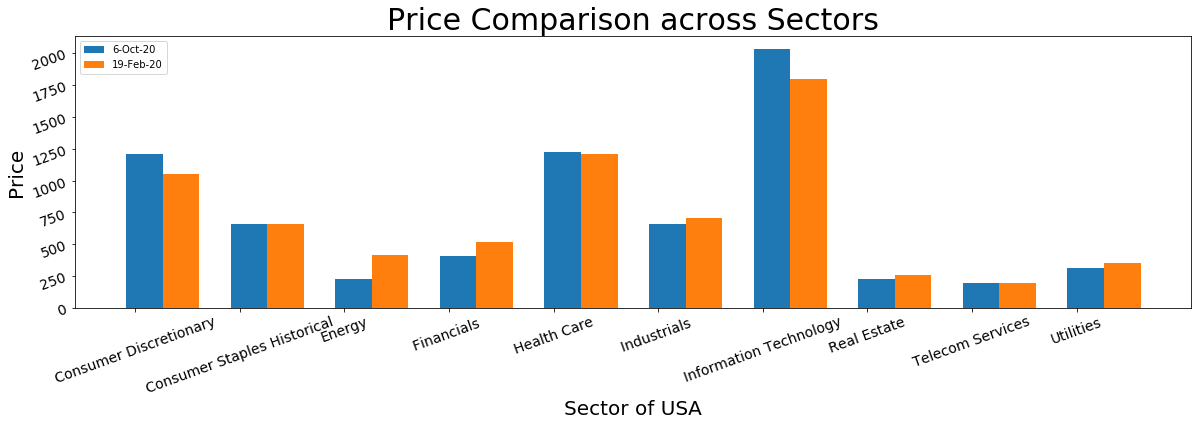

In [20]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


# Get the data
data = pd.read_csv('usa11sector.csv')

data = data.rename(columns = {'Price ': 'Price'})
# data['Price'] = pd.to_numeric(data['Price'], errors='1coerce') #### convert string column to numeric

arr_date = data['Date'].unique()

list_dates_price = []
for i in range(len(arr_date)):
    # i = 0
    date = arr_date[i]
    price = data[data['Date'] == date]
    price = price[['Sector', 'Price']].sort_values(by = ['Sector'])
    list_dates_price.append(price)

width = 0.35

plt.figure(figsize=[20, 5])
# for i in range(len(list_dates_price)):
df1 = list_dates_price[0]
x = df1['Sector']
y1 = tuple(df1['Price'])
N = len(df1)
ind = np.arange(N) 

df2 = list_dates_price[1]
# x2= df2['Sector']
y2 = tuple(df2['Price'])
plt.bar(ind, y1, width, label = arr_date[0])
plt.bar(ind + width, y2, width, label = arr_date[1])
plt.xlabel('Sector of USA', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.title('Price Comparison across Sectors', fontsize = 30)
plt.xticks(ind - width / 4, tuple(x))
plt.tick_params(labelsize=14, rotation=20)
plt.legend(arr_date, loc='upper left')
plt.show()

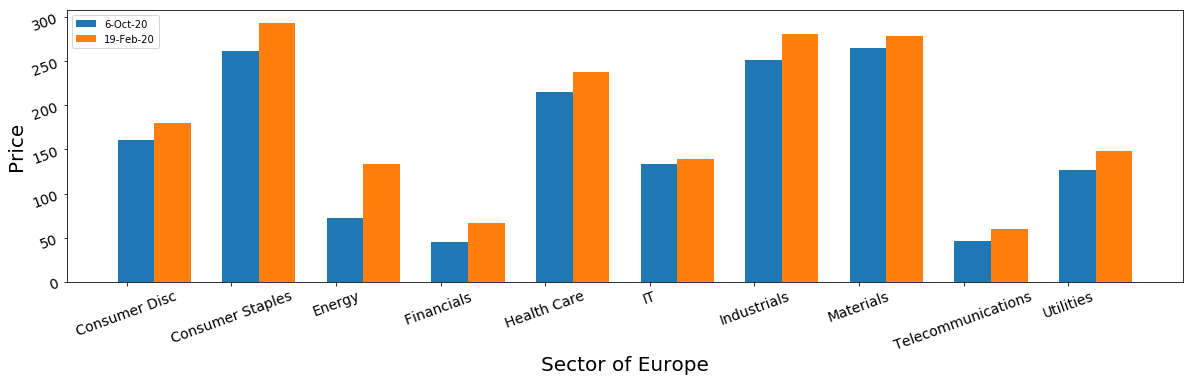

In [15]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


# Get the data
data = pd.read_csv('eu11sector.csv')

data = data.rename(columns = {'Price ': 'Price'})
# data['Price'] = pd.to_numeric(data['Price'], errors='1coerce') #### convert string column to numeric

arr_date = data['Date'].unique()

list_dates_price = []
for i in range(len(arr_date)):
    # i = 0
    date = arr_date[i]
    price = data[data['Date'] == date]
    price = price[['Sector', 'Price']].sort_values(by = ['Sector'])
    list_dates_price.append(price)


width = 0.35

plt.figure(figsize=[20, 5])
# for i in range(len(list_dates_price)):
df1 = list_dates_price[0]
x = df1['Sector']
y1 = tuple(df1['Price'])
N = len(df1)
ind = np.arange(N) 

df2 = list_dates_price[1]
# x2= df2['Sector']
y2 = tuple(df2['Price'])
plt.bar(ind, y1, width, label = arr_date[0])
plt.bar(ind + width, y2, width, label = arr_date[1])
plt.xlabel('Sector of Europe', fontsize=20)
plt.ylabel('Price', fontsize=20)
# plt.title('Price Comparison across Sectors', fontsize = 30)
plt.xticks(ind - width / 4, tuple(x))
plt.tick_params(labelsize=14, rotation=20)
plt.legend(arr_date, loc='upper left')
plt.show()

As bar charts show, all industry sectors of European stock market are losing money. Maybe you had foreseen this result before, as almost all european stock markets were beaten to the ground and are suffering a long tough. Bad news here!      

But the situation in the U.S. is quite different. First of all, several sectors (Consumer Discretionary, Health Care, IT) are growing, which has a large market share. IT sector, in particular, is not only the most price-representative sector, but also the one with the highest growth (almost 15% in 8 months!). However, the performance of other sectors like Energy and Financials are not unsatisfactory. The decline in these sectors is considerably, but due to the small market share, they have very limited impact on the general stock market index, which is always regarded as one of the most important stock market indicators. 

### Answer: The IT Sector Is Driving the Growth!


Small tips: 
The unsatisfactory performance of Energy and Financials sectors does not mean they won't rebounce strongly later. Quite the opposit, the stocks with a lower price have much more space to grow. But wait, not all companies worth an investment! Even some counpanies from  American IT sector might be a dangerous bomb. A new question raise up, here we go!



## <center> Company Level : Make Your Choise!<center>

### Question 4: Which company Should We Invest?

To answeranswer this question, we analysed 500 american companies from **S&P 500** and 300 Chinese companies from the **CSI 300** Index. And we discovered the correlation of a company's stock price change rate and these 4 key financial and operating information:          
- number of employees     
- enterprise value       
- quarterly growth        
- profit margins (which reflects the earning power of the company).



#### <center>Company Factors V.S. Stock change rate
_*zoom in to see the details.*_

##### &ensp;&emsp;&emsp;&emsp;&emsp;&emsp; the U.S. &ensp; &ensp; &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; &ensp; &emsp;&emsp;&emsp;&emsp;&emsp; &emsp; &emsp;China

In [16]:
S_P_info = pd.read_csv('Data For Project/S_P500 Company Info.csv')
S_P_his = pd.read_csv('Data For Project/S_P500 Company History.csv',parse_dates=['Date'])
DAX_info = pd.read_csv('Data For Project/DAX30 Company Info.csv')
DAX_his = pd.read_csv('Data For Project/DAX30 Company History.csv',parse_dates=['Date'])
CSI_info = pd.read_csv('Data For Project/CSI300 Company Info.csv')
CSI_his = pd.read_csv('Data For Project/CSI300 Company History.csv',parse_dates=['Date'])

def get_growth(df):
    df=df.rename(columns={'Date':'date'})
    df = clipe_date(df,start_date,end_date)
    df = df.set_index('date')
    growth= df.apply(lambda x: x/x[0]-1)
    growth = growth[-1:]
    growth = growth.T
    growth.columns=['change rate']
    growth.sort_index(inplace=True)
    return growth

S_P_growth = get_growth(S_P_his)
DAX_growth = get_growth(DAX_his)
CSI_growth= get_growth(CSI_his)

def sort_merge_info(df,df2):
    df=df.set_index('Name')
    df.sort_index(inplace=True)
    return df.join(df2)

S_P_info=sort_merge_info(S_P_info,S_P_growth)
DAX_info=sort_merge_info(DAX_info,DAX_growth)
CSI_info=sort_merge_info(CSI_info,CSI_growth)

S_P_info.head(2)
factors_country = ['FullTimeEmployees','EnterpriseValue','EarningsQuarterlyGrowth','ProfitMargins']

def plot_Scatter_countries(source,factor):
    Map=alt.Chart(source).mark_circle().encode(
        x=factor,
        y=alt.Y('change rate',title='change rate'),
        color=alt.Color('LongName',title='company',legend=alt.Legend(columns=2)),
        tooltip = ['LongName','change rate']
    ).properties(
        width=200,
        height=150
    ).interactive()
    line=line = alt.Chart(pd.DataFrame({'y': [0]})).mark_rule().encode(y='y')
    return Map+line

maps = []

for factor in enumerate(factors_country):
    maps.append(plot_Scatter_countries(S_P_info,factor[1]))
    maps.append(plot_Scatter_countries(CSI_info,factor[1]))
#     maps.append(plot_Scatter_countries(DAX_info,factor[1]))
plot = None
for row in np.array_split(np.array(maps),4):
    row_plot = row[0]
    for col in row[1:]:
        row_plot |= col
    if plot:
        plot &= row_plot
    else:
        plot = row_plot
        
plot

alt.VConcatChart(...)

The scatter chart don't disappoint us: horizontally, the charts made by 500 U.S. companies forms a triangle with a corner pointing to the right. It is almost equally divided above and below the zero-line, which means profitable and unprofitable companies are half-half. Let's have a quick glance at the second column where 300 Chinese companies are plotted. All points form a L-shape, with the vast majority above the zero-line. A Completely different distribution, isn't it?                    

                      
   *|| United States | China|
---|------| ------
Shape | Triangle|L-Shape|
Distribution|Half-Half| Most above|

 

This tells that **the growth of Chinese stock market is not only driven by large companies, but by companies of different size, profit margins.** They contribute their growth a lot to the national overall index. 

Vertically, the chart of Enterprice Value caught our attention. While the vast majority of company stocks are having an uncertain future in terms of gaining or losing, several large companies have grown a lot. Most of them are **IT Gaints: Apple, Microsoft, Amazon, Facebook, etc. As COVID-19 will compare us for years, we have no reason to doubt that the stock price of these IT Gaints will go up further.**

Wait, there's one more thing to discuss! In the chart of Full Time Employees we can see a great difference from China and the States. The big Chinese companies with more full time employees are mostly under the zero-line, while big companies in the States are gaining! It maybe because China has more Labor-intensive industries. The points shown in this chart to be having most employees are mostly Labor-intensive (Chemicals manufacturing, auto) and socially disadvantaged companies (Insurance). Besides them, many banks from Financials Sector are also included.

OMG, investment is so complicated. But we had made it easier with data visualisation! Now we can answer the last question with confidence!

### Answer: It deponds on where would you like to invest. 

- China: Less Employees + High Enterprise value
- U.S.: More Employess + High Enterprise value

### Some investment advice

After analysing the market performance in 3 aspects, we can drawn some surprising conclusions:        

1. The impact of the epidemic on the stock market is temporary. It is unwise to guide investment based on the epidemic situation. The country with strict policy toward COVID-19, higher GDP and lower median age are proved to have better market performace.
2. The rapid rebound of US stocks relies on large companies and technology sectors. Traditional industries are still seriously lagging behind. So, **value investment** seekers, grab your chance and choose some good companies. By choosing companies, enterprice level could be considered.               
3. Small and medium companies in the Chinese stock market have great vitality. Good for **high-risk-high-reward** investors.
4. Most European stock markets are not favored by the market, so investment is not recommended for **short-term investor**. What you can do is to find out a country with highest market vitality by using our price line chart at the beginning and try you luck!

**The uncertainty during COVID-19 pandemic has made investors hesitant. The turmoil in the stock market will eventually pass. What we need to overcome is just the panic when we face the unknown.**

## Don't Leave! We Have Easter Eggs!

Here we provid you with a list of TOP 15 profitable companies and unprofitable companies. You may find your favorite egg here. Come! Find it!

## <center> Profit Gainers in 2020<center>

In [17]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

#The data of top companies profit of years 2019 and 2020 of the world by Fortune was collected from the source given below. 
#https://www.someka.net/excel-template/fortune-global-500-list/

df_2019 = pd.read_csv('global-2019.csv')
dfff1 = df_2019.set_index('Company Name')


df_2020 = pd.read_csv('global-2020.csv')
dfff = df_2020.set_index('Company Name')

# We were interested in getting to know the profit figures of companies of USA, Germany and China in the year 2020 and wanted 
# to compare with with year 2019.



In [18]:
# companies from year 2019 and 2020 were chosen randomly from USA, Germany and China as profit gainer.

df_19 =dfff1.loc[['BASF','Deutsche Telekom','Walmart','Berkshire Hathaway','Amazon.com','UnitedHealth Group', 'McKesson',
                    'AmerisourceBergen','Sinopec Group','Verizon Communications','Ping An Insurance',
                  'Alibaba Group Holding','Pfizer','Merck','AIA Group'],:]
df_19.reset_index()


df_20 =dfff.loc[['BASF','Deutsche Telekom','Walmart','Berkshire Hathaway','Amazon.com','UnitedHealth Group', 'McKesson',
                    'AmerisourceBergen','Sinopec Group','Verizon Communications','Ping An Insurance',
                 'Alibaba Group Holding','Pfizer','Merck','AIA Group'],:]


# Plotting br chart of companies profit (2019)
y19=alt.Chart(df_19.reset_index()).mark_bar().encode(
    y='Profits-2019(mUSD):Q',
    x='Company Name',
    color ='Company Name',tooltip=['Company Name','Profits-2019(mUSD):Q'] 
).properties(width=300, height= 400  ,title='Bar chart of companies profit (2019)' ).interactive()


# Plotting br chart of companies profit (2020)
y20 =alt.Chart(df_20.reset_index()).mark_bar().encode(
    y='Profits-2020 (mUSD):Q',
    x='Company Name',
    color ='Company Name',tooltip=['Company Name', 'Profits-2020 (mUSD):Q'] 
).properties(width=300, height= 400  ,title='Bar chart of companies profit (2020)' ).interactive()

y19 | y20

alt.HConcatChart(...)


    
    

<center>Amazon - Technology company based on e-commerce, US<center>
<br>
<center>Amerisource Bergen - Drug wholesale company, US<center>
<br>
<center>BASF - chemical Corporation, German <center>
<br>
<center>Berkshire Hathaway - Casualty insurance company, US<center>
<br>
<center>Deutsche Telekom - Telecommunications company, German<center>
<br>
<center>McKesson Corporation - Pharmaceuticals and medical supplies distributing company, US<center>
<br>
<center>Sinopec Group - Petroleum & Chemical Corporation, China<center>
<br>
<center>UnitedHealth Group - Health care company, US<center>
<br>
<center>Verizon - Communication technology companies, US<center>
<br>
<center>Walmart - Retail corporation, US<center>
<br>
<center>Ping An Insurance - Insurance Company, China<center>
<br>
<center>Alibaba Group Holding - E-commerce, retail, Internet, and technology company, China<center>
<br>
<center>Pfizer - Pharmaceutical corporation, US<center>
<br>
<center>Merck - Pharmaceutical drugs and vaccines manufacturer, US<center>
<br>
<center>AIA Group - Insurance and finance corporation, China <center>

## <center> Profit Losers in 2020<center>

In [19]:
# companies from year 2019 and 2020 were chosen randomly from USA, Germany and China as a profit losser.

df_19_Loser=dfff1.loc[['Daimler', 'BMW Group','Siemens','Bosch Group','Lufthansa Group','SAP','Exxon Mobil', 
                           'AT&T','SAIC Motor','Fannie Mae','Chevron','General Motors','Wells Fargo','PepsiCo'],:]

df_20_Loser =dfff.loc[['Daimler', 'BMW Group','Siemens','Bosch Group','Lufthansa Group','SAP','Exxon Mobil', 
                           'AT&T','SAIC Motor','Fannie Mae','Chevron','General Motors','Wells Fargo','PepsiCo'],:]

#Plotting bar chart 
y19_loser=alt.Chart(df_19_Loser.reset_index()).mark_bar().encode(
    y='Profits-2019(mUSD):Q',
    x='Company Name',
    color ='Company Name',tooltip=['Company Name','Profits-2019(mUSD):Q'] 
).properties( width=300, height= 400  ,title='Bar chart of companies profit (2019)').interactive()


#Plotting bar chart 
y20_Loser =alt.Chart(df_20_Loser.reset_index()).mark_bar().encode(
    y='Profits-2020 (mUSD):Q',
    x='Company Name',
    color ='Company Name',tooltip=['Company Name', 'Profits-2020 (mUSD):Q'] 
).properties( width=300, height= 400  ,title='Bar chart of companies profit (2020)' ).interactive()

y19_loser | y20_Loser

alt.HConcatChart(...)

<center>BMW Group - Vehicles manufacturing company, German<center>
<br>
<center>Bosch Group - Engineering and technology company, German<center>
<br>
<center>Daimler - Automotive corporation, German<center>
<br>
<center>Exon Mobil - Oil and gas corporation, US<center>
<br>
<center>Lufthansa Group - Airline, German<center>
<br>
<center>SAIC Motor - Automotive design and manufacturing company, China<center>
<br>
<center>SAP - Software corporation, German<center>
<br>
<center>Siemens - Industrial manufacturing company, German<center>
<br>
<center>Fannie Mae - National Mortgage Association, US<center>
<br>
<center>Chevron - Oil & Gas company, US<center>
<br>
<center>General Motors - Vehicles manufacturer and distributor, US<center>
<br>
<center>Wells Fargo	- Financial services company, US<center>
<br>
<center>PepsiCo -  Food, snack and beverage corporation, US<center>